# 2. View Dataset
Load pustaka program K-NN dan tampilkan dataset kredit resiko

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Membaca file Excel
train_df = pd.read_excel('kelulusan_train.xls')
test_df = pd.read_excel('kelulusan_test.xls')

train_df.head()




,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [2]:
test_df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


# 3. Data Preparation
Lakukan perbaikan dataset, misal data kosong diganti dengan rata-rata data.

In [3]:
train_df.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [4]:
test_df.isnull().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               4
IPK                 3
STATUS KELULUSAN    0
dtype: int64

Karena pada data diatas terdapat nilai 0.0, dimana data ini akan dianggap tidak valid, maka kita bisa mengganti

In [63]:
# Ganti nilai 0.0 pada IPS 8 menjadi NaN
import numpy as np
test_df['IPS 8'] = test_df['IPS 8'].replace(0, np.nan)
train_df['IPS 8'] = train_df['IPS 8'].replace(0, np.nan)
# Ganti nilai 0 menjadi NaN di IPS 6 dan IPS 7
test_df[['IPS 6', 'IPS 7']] = test_df[['IPS 6', 'IPS 7']].replace(0, np.nan)

# Menangani Missing Values
Missing values ditangani dengan mean, median atau modus. Agar lebih tepat, maka kita bisa melihat data distribusinya terlebih dahulu

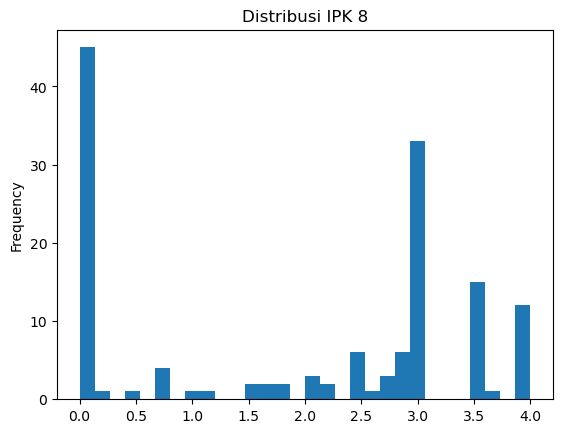

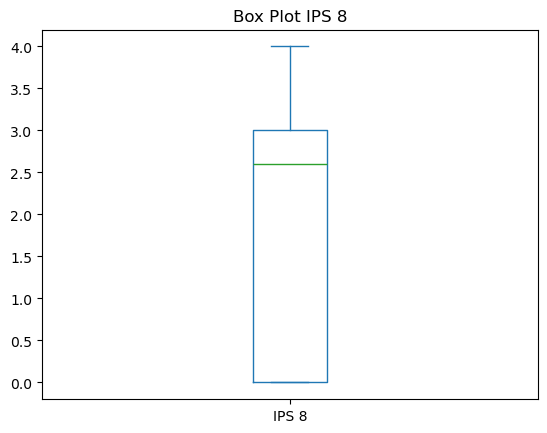

In [5]:
#Pada Kolom IPS 8 dalam test_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK 8')
plt.show()

# Box plot untuk memeriksa outlier
test_df['IPS 8'].plot(kind='box')
plt.title('Box Plot IPS 8')
plt.show()


Karena IPS ini distribusinya tidak normal, maka kita akan menggunakan median untuk mengisi nilai yang hilang

In [6]:
test_df['IPS 8'].fillna(test_df['IPS 8'].median(), inplace=True)


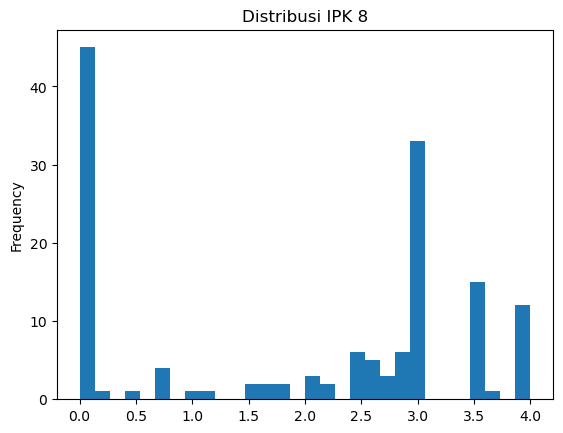

In [7]:
#Pada Kolom IPS 8 dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK 8')
plt.show()

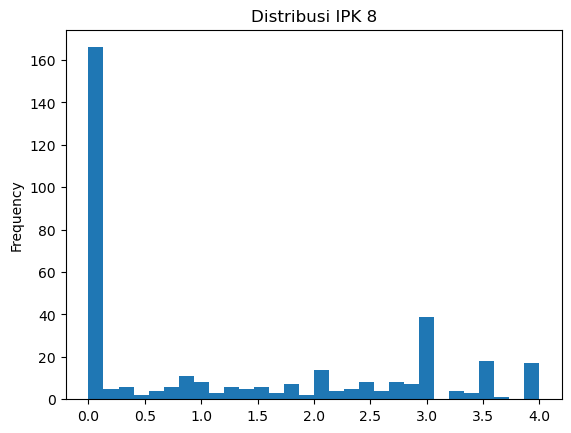

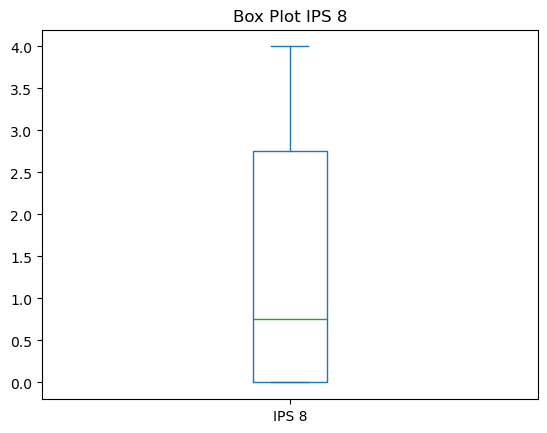

In [8]:
import matplotlib.pyplot as plt

# Visualisasi distribusi data
train_df['IPS 8'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK 8')
plt.show()

# Box plot untuk memeriksa outlier
train_df['IPS 8'].plot(kind='box')
plt.title('Box Plot IPS 8')
plt.show()

Karena IPS ini distribusinya tidak normal, maka kita akan menggunakan median untuk mengisi nilai yang hilang

In [9]:
train_df['IPS 8'].fillna(train_df['IPS 8'].median(), inplace=True)


In [10]:
# Isi NaN dengan median pada kolom IPS 6 dan IPS 7
test_df['IPS 6'] = test_df['IPS 6'].fillna(test_df['IPS 6'].median())
test_df['IPS 7'] = test_df['IPS 7'].fillna(test_df['IPS 7'].median())

Menangani Nilai IPK

In [11]:
# Menampilkan semua kolom di DataFrame test_df
print(test_df.columns)


Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK ', 'STATUS KELULUSAN'],
      dtype='object')


In [12]:
# Menghapus spasi ekstra dari nama kolom
test_df.columns = test_df.columns.str.strip()

# Memeriksa kembali kolom yang ada
print(test_df.columns)


Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK', 'STATUS KELULUSAN'],
      dtype='object')


In [13]:
# Menghapus spasi ekstra dari nama kolom
train_df.columns = train_df.columns.str.strip()

# Memeriksa kembali kolom yang ada
print(train_df.columns)

Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK', 'STATUS KELULUSAN'],
      dtype='object')


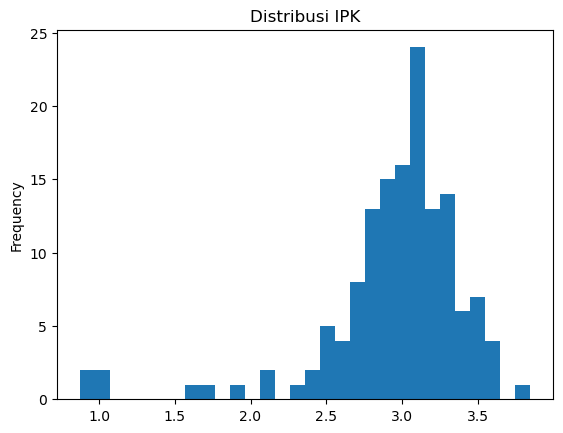

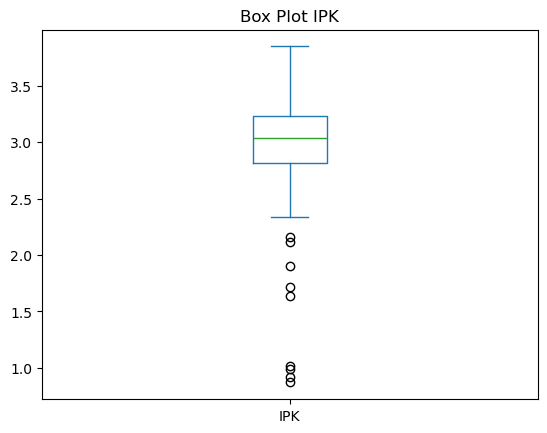

In [14]:
#Pada Kolom IPK dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
test_df['IPK'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK')
plt.show()

# Box plot untuk memeriksa outlier
test_df['IPK'].plot(kind='box')
plt.title('Box Plot IPK')
plt.show()

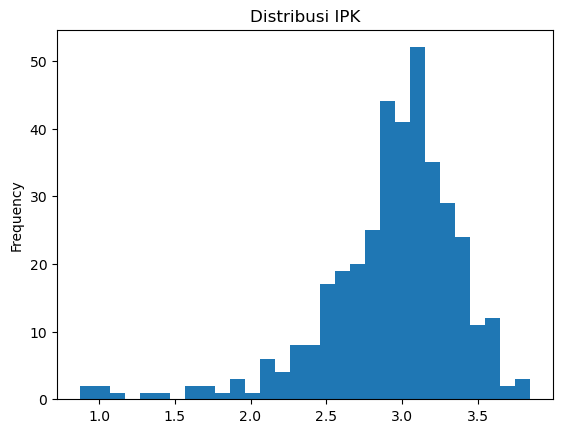

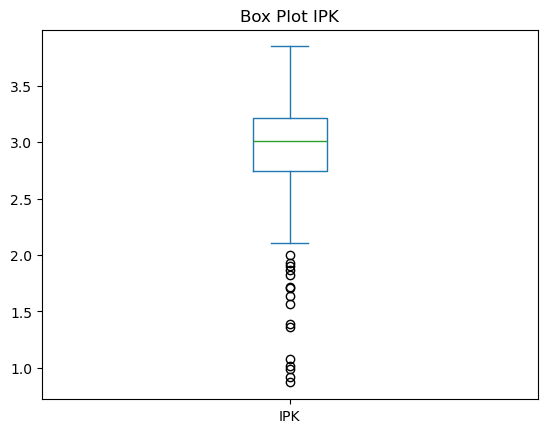

In [15]:
#Pada Kolom IPK dalam train_df
import matplotlib.pyplot as plt

# Visualisasi distribusi data
train_df['IPK'].plot(kind='hist', bins=30)
plt.title('Distribusi IPK')
plt.show()

# Box plot untuk memeriksa outlier
train_df['IPK'].plot(kind='box')
plt.title('Box Plot IPK')
plt.show()

Ubah lagi yaa


In [16]:
test_df['IPK'].fillna(test_df['IPK'].median(), inplace=True)
train_df['IPK'].fillna(train_df['IPK'].median(), inplace=True)


In [17]:
train_df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [18]:
test_df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [19]:
train_df.isna().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [20]:
test_df.isna().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [21]:
test_df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,2.60,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT


In [22]:
train_df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


# 4. Data Preprocessing
Proses data dengan menentukan variabel yang ingin diprediksi Y (dependent variable), mengambil
variabel X (independent variable) yang digunakan untuk memprediksi Y.

In [23]:
# Menghapus kolom 'NAMA' di kedua dataset
train_df = train_df.drop(columns=['NAMA'])
test_df = test_df.drop(columns=['NAMA'])


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Label Encoding untuk kolom dengan 2 kategori
label_encoder = LabelEncoder()
train_df['JENIS KELAMIN'] = label_encoder.fit_transform(train_df['JENIS KELAMIN'])
test_df['JENIS KELAMIN'] = label_encoder.transform(test_df['JENIS KELAMIN'])

# One-Hot Encoding untuk kolom dengan banyak kategori
train_df = pd.get_dummies(train_df, columns=['STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN'])
test_df = pd.get_dummies(test_df, columns=['STATUS MAHASISWA', 'STATUS NIKAH', 'STATUS KELULUSAN'])


In [25]:
# Pastikan kolom train dan test sesuai
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


In [27]:
print(train_df.columns)


Index(['JENIS KELAMIN', 'UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5',
       'IPS 6', 'IPS 7', 'IPS 8', 'IPK', 'STATUS MAHASISWA_BEKERJA',
       'STATUS MAHASISWA_MAHASISWA', 'STATUS NIKAH_BELUM MENIKAH',
       'STATUS NIKAH_MENIKAH', 'STATUS KELULUSAN_TEPAT',
       'STATUS KELULUSAN_TERLAMBAT'],
      dtype='object')


In [28]:
# Memisahkan fitur dan target seperti sebelumnya
X_train = train_df.drop(columns=['STATUS KELULUSAN_TEPAT', 'STATUS KELULUSAN_TERLAMBAT'])
y_train = train_df['STATUS KELULUSAN_TEPAT']  # atau 'STATUS KELULUSAN_TERLAMBAT'

X_test = test_df.drop(columns=['STATUS KELULUSAN_TEPAT', 'STATUS KELULUSAN_TERLAMBAT'])
y_test = test_df['STATUS KELULUSAN_TEPAT'] 


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

k_range = range(1, 21)  # Menguji nilai k dari 1 hingga 20
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(np.mean(scores))

optimal_k = k_range[np.argmax(cv_scores)]  # Menemukan k dengan akurasi tertinggi
print(f"Optimal k: {optimal_k}")


Optimal k: 3


In [30]:
# Inisialisasi model KNN dengan jumlah tetangga k = 5
knn = KNeighborsClassifier(n_neighbors=5)

# Latih model dengan data training
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [31]:
# Prediksi dengan data test
y_pred = knn.predict(X_test)

# Evaluasi model menggunakan akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Menampilkan laporan klasifikasi
print(classification_report(y_test, y_pred))


Accuracy: 0.9517241379310345
              precision    recall  f1-score   support

       False       0.22      1.00      0.36         2
        True       1.00      0.95      0.97       143

    accuracy                           0.95       145
   macro avg       0.61      0.98      0.67       145
weighted avg       0.99      0.95      0.97       145



In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

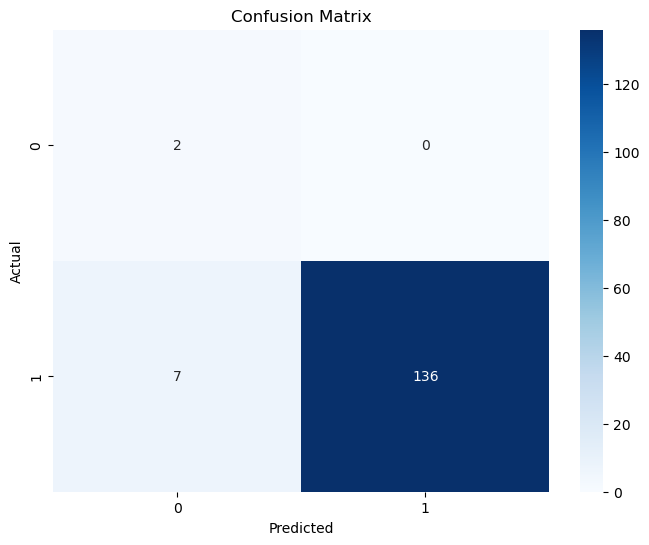

In [33]:
# Melakukan prediksi
y_pred = knn.predict(X_test)

# Menghitung confusion matrix atau mengevaluasi
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

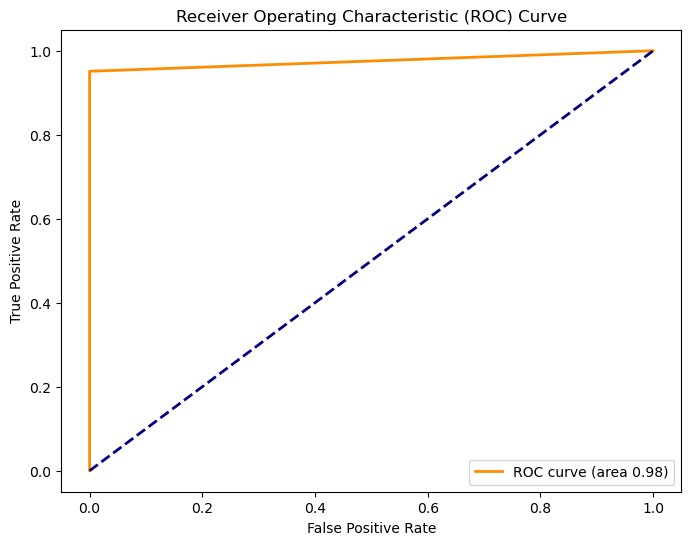

In [34]:
# Menghitung nilai false positive rate (fpr) dan true positive rate (tpr) untuk kurva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [35]:
# Evaluasi Model
y_pred = knn.predict(X_test)

# Confusion Matrix dan Classification Report
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Confusion Matrix:
 [[  2   0]
 [  7 136]]

Classification Report:
               precision    recall  f1-score   support

       False       0.22      1.00      0.36         2
        True       1.00      0.95      0.97       143

    accuracy                           0.95       145
   macro avg       0.61      0.98      0.67       145
weighted avg       0.99      0.95      0.97       145

